## **N-gram Language Model**

In [1]:
!pip install -U torchtext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install torchdata

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 5.2 MB/s 
     |████████████████████████████████| 139 kB 44.7 MB/s 
     |████████████████████████████████| 127 kB 39.0 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [3]:
import torch
import torch.nn as nn

import torchtext
from torchtext.datasets import SST2 # https://pytorch.org/text/stable/datasets.html#torchtext.datasets.SST2 Sentimennt Analysis Dataset
from torchtext.data.utils import get_tokenizer

from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

In [14]:
train_data = SST2(split='train')
tokenizer = get_tokenizer('basic_english')
train_data = [tokenizer(text) for (text, label) in train_data]
print('train_data:')
print(train_data[:50])

train_data:
[['hide', 'new', 'secretions', 'from', 'the', 'parental', 'units'], ['contains', 'no', 'wit', ',', 'only', 'labored', 'gags'], ['that', 'loves', 'its', 'characters', 'and', 'communicates', 'something', 'rather', 'beautiful', 'about', 'human', 'nature'], ['remains', 'utterly', 'satisfied', 'to', 'remain', 'the', 'same', 'throughout'], ['on', 'the', 'worst', 'revenge-of-the-nerds', 'clichés', 'the', 'filmmakers', 'could', 'dredge', 'up'], ['that', "'", 's', 'far', 'too', 'tragic', 'to', 'merit', 'such', 'superficial', 'treatment'], ['demonstrates', 'that', 'the', 'director', 'of', 'such', 'hollywood', 'blockbusters', 'as', 'patriot', 'games', 'can', 'still', 'turn', 'out', 'a', 'small', ',', 'personal', 'film', 'with', 'an', 'emotional', 'wallop', '.'], ['of', 'saucy'], ['a', 'depressed', 'fifteen-year-old', "'", 's', 'suicidal', 'poetry'], ['are', 'more', 'deeply', 'thought', 'through', 'than', 'in', 'most', '`', 'right-thinking', "'", 'films'], ['goes', 'to', 'absurd', 'len

In [15]:
corpus = [word.lower() for sentence in train_data for word in sentence]
print('corpus:')
print(corpus[:50])

corpus:
['hide', 'new', 'secretions', 'from', 'the', 'parental', 'units', 'contains', 'no', 'wit', ',', 'only', 'labored', 'gags', 'that', 'loves', 'its', 'characters', 'and', 'communicates', 'something', 'rather', 'beautiful', 'about', 'human', 'nature', 'remains', 'utterly', 'satisfied', 'to', 'remain', 'the', 'same', 'throughout', 'on', 'the', 'worst', 'revenge-of-the-nerds', 'clichés', 'the', 'filmmakers', 'could', 'dredge', 'up', 'that', "'", 's', 'far', 'too', 'tragic']


In [16]:
vocab = set(corpus)
print('vocab (unique words):')
print(vocab)

vocab (unique words):
{'hjelje', 'one-room', 'grandiloquent', 'accomplishment', 'same', 'countless', 'member', 'romanek', 'pootie', 'priceless', 'name', 'candid', 'accents', 'rent', 'masterpeice', 'uninspiring', 'moves', 'described', 'think', 'poo', 'pauly', 'unhappiness', 'cavorting', 'arcane', 'amini', 'reinforcement', 'lunatic', 'appétit', 'amount', 'rehash', 'emergency', 'calculating', 'greenlight', 'latest', 'colgate', 'waster', 'aliens', 'racist', 'purposeful', 'automatic', 'deepest', 'deviously', 'insensitivity', 'cultivation', 'selves', 'parade', 'indictment', 'everybody', 'kidd', 'commands', 'mankind', 'me', 'well-directed', 'been', 'wretched', 'preceded', 'religious', 'raucous', 'encourage', 'distinctly', 'providing', 'impudent', 'downfall', 'larky', 'pop-up', 'yields', 'parachutes', 'creepy', 'seated', 'veracity', 'favored', 'sally', 'launch', 'probe', 'obligation', 'refusing', 'gorgeous', 'mishandled', '3000', 'garcía', 'self-deprecating', 'education', 'brilliantly', 'angle

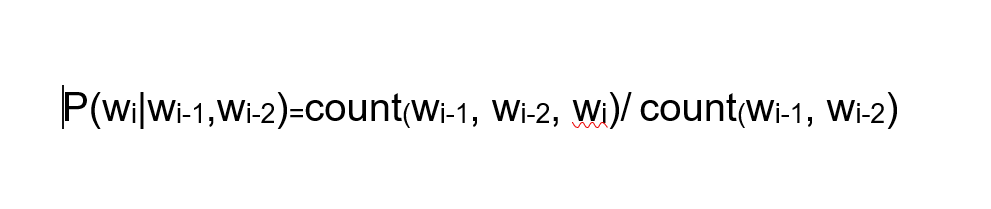

In [24]:
bigrams = {}
trigrams = {}

for i in range(len(corpus) - 2):
    bigram = (corpus[i], corpus[i+1])
    trigram = (corpus[i], corpus[i+1], corpus[i+2])
    
    bigrams[bigram] = bigrams[bigram] + 1 if bigram in bigrams else 1
    trigrams[trigram] = trigrams[trigram] + 1 if trigram in trigrams else 1

In [25]:
def get_next_n_words(inp, n):
    tokens = tokenizer(inp.lower())
    last_bigram = tokens[-2:]
    
    word_probs = {}

    for word in vocab:
        cur_bigram = (last_bigram[0], last_bigram[1])
        cur_trigram = (last_bigram[0], last_bigram[1], word)

        cur_bigram_count = bigrams[cur_bigram] if cur_bigram in bigrams else 0
        cur_trigram_count = trigrams[cur_trigram] if cur_trigram in trigrams else 0
        
        word_probs[word] = cur_trigram_count / cur_bigram_count
    
    next_words = sorted(word_probs.items(), key=lambda x: x[1], reverse=True)[:n]
    
    return next_words

In [26]:
get_next_n_words('is the', 5)

[('kind', 0.12912912912912913),
 ('best', 0.07807807807807808),
 ('fact', 0.02702702702702703),
 ('most', 0.02702702702702703),
 ('heart', 0.02702702702702703)]